In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path
%matplotlib inline
sns.set()
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 46kB/s 
     |████████████████████████████████| 491kB 33.9MB/s 
     |████████████████████████████████| 3.2MB 39.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/Silver.csv") 

In [0]:
df.tail()

,date,silverOpen,silverHigh,silverLow,silverClose,voume,devise
1036,22/04/2020 19:21,15.270,15.28,15.265,15.275,0,USD
1037,22/04/2020 19:22,15.280,15.29,15.260,15.275,0,USD
1038,22/04/2020 19:23,15.280,15.30,15.270,15.295,0,USD
1039,22/04/2020 19:24,15.300,15.31,15.280,15.300,0,USD
1040,22/04/2020 19:25,15.305,15.32,15.277,15.277,0,USD


In [0]:
df.head()

,date,silverOpen,silverHigh,silverLow,silverClose,voume,devise
0,22/04/2020 02:05,14.935,14.940,14.920,14.930,0,USD
1,22/04/2020 02:06,14.925,14.930,14.910,14.915,0,USD
2,22/04/2020 02:07,14.920,14.925,14.910,14.915,0,USD
3,22/04/2020 02:08,14.920,14.920,14.895,14.895,0,USD
4,22/04/2020 02:09,14.900,14.925,14.900,14.920,0,USD


In [0]:
#change type dat to datetime
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [0]:
df.describe()

,silverOpen,silverHigh,silverLow,silverClose,voume
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.0
mean,14.967582,14.975884,14.906585,14.968542,0.0
std,0.123621,0.123513,0.328886,0.123175,0.0
min,14.740000,14.760000,13.070000,14.750000,0.0
25%,14.860000,14.865000,14.840000,14.860000,0.0
50%,14.965000,14.975000,14.945000,14.970000,0.0
75%,15.080000,15.090000,15.065000,15.080000,0.0
max,15.305000,15.320000,15.280000,15.300000,0.0


Text(0.5, 0, 'Time')

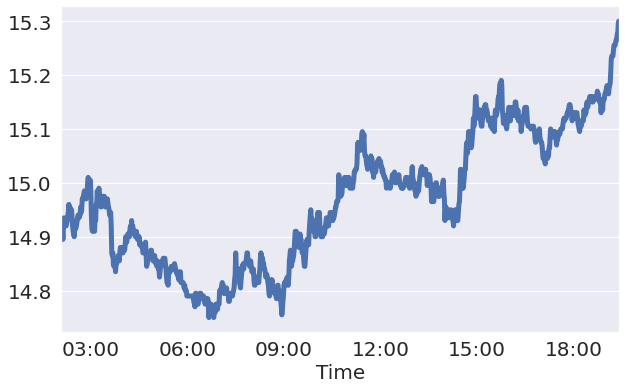

In [0]:
df['silverClose'].plot(figsize=(10,6), linewidth=5, fontsize=20)
#ax=plt.axes()
#ax.set_facecolor("white")
plt.xlabel('Time', fontsize=20)

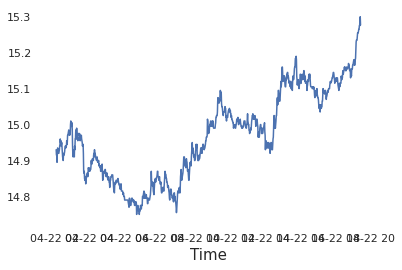

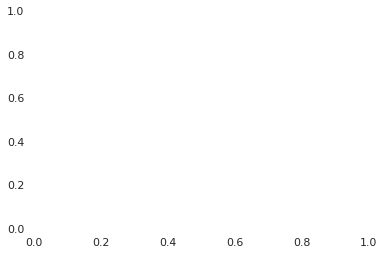

In [0]:
import matplotlib.pyplot as plt
plt.plot(df['silverClose'])
#plt.legend(loc = 'upper left')
#plt.title("Loss function for the training and validation training")
plt.xlabel('Time',fontsize = 15)
plt.savefig('/content/drive/My Drive/Colab Notebooks/k.eps',dpi=1000)
fig,ax = plt.subplots()
ax.axis('on')
#plt.grid()

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Time')

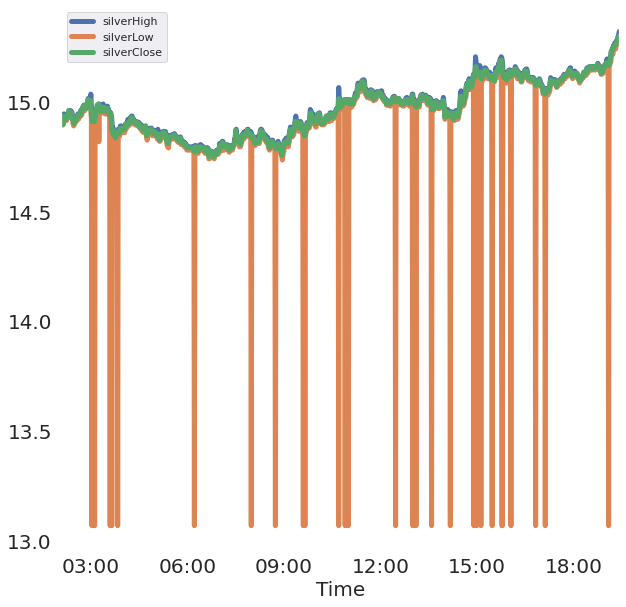

In [0]:
df[['silverHigh','silverLow','silverClose']].plot(figsize=(10,10), linewidth=5, fontsize=20)
ax=plt.axes()
ax.set_facecolor("white")
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlabel('Time', fontsize=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Time')

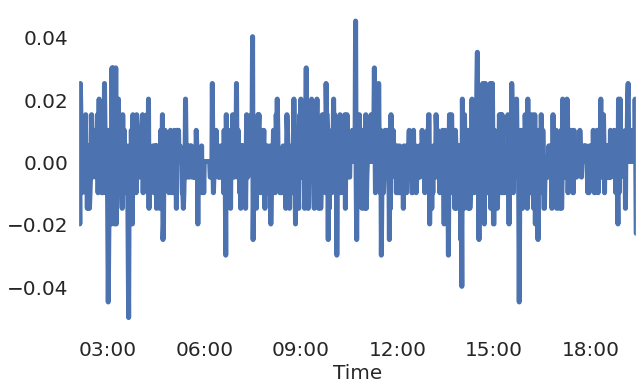

In [0]:
#Volatility
df['silverClose'].diff(periods=1).plot(figsize=(10,6),linewidth=5,fontsize=20)
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel('Time', fontsize=20)

In [0]:
df.iloc[:, 0]

0       22/04/2020 02:05
1       22/04/2020 02:06
2       22/04/2020 02:07
3       22/04/2020 02:08
4       22/04/2020 02:09
              ...       
1036    22/04/2020 19:21
1037    22/04/2020 19:22
1038    22/04/2020 19:23
1039    22/04/2020 19:24
1040    22/04/2020 19:25
Name: date, Length: 1041, dtype: object

## Scaling the data

In [0]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.327272
1,0.299999
2,0.299999
3,0.263638
4,0.309090



## Forecast
This example is using model 1.lstm, if you want to use another model, need to tweak a little bit, but I believe it is not that hard.

I want to forecast 30 days ahead! So just change test_size to forecast t + N ahead.

Also, I want to simulate 10 times, 10 variances of forecasted patterns. Just change simulation_size.

In [0]:
simulation_size = 10
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 60
learning_rate = 0.01

df_train = df_log
df.shape, df_train.shape

((1041, 7), (1041, 1))

In [0]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [0]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(minutes = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(minutes= 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.4)
    
    return deep_future

In [0]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

train loop: 100%|██████████| 300/300 [04:04<00:00,  1.23it/s, acc=98.1, cost=0.000788]


simulation 2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:01<00:00,  1.24it/s, acc=98.1, cost=0.000888]


simulation 3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:02<00:00,  1.24it/s, acc=98.1, cost=0.00076]


simulation 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:02<00:00,  1.24it/s, acc=98.2, cost=0.000691]


simulation 5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:04<00:00,  1.23it/s, acc=98.3, cost=0.000676]


simulation 6


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:05<00:00,  1.22it/s, acc=98, cost=0.000916]


simulation 7


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:04<00:00,  1.23it/s, acc=98.2, cost=0.000713]


simulation 8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:06<00:00,  1.21it/s, acc=98.1, cost=0.00084]


simulation 9


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:02<00:00,  1.24it/s, acc=98.1, cost=0.00087]


simulation 10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [04:04<00:00,  1.23it/s, acc=98.2, cost=0.000733]


In [0]:
date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()
date_ori[-1] + timedelta(minutes = 1)

Timestamp('2020-04-22 19:26:00')

In [0]:
date_ori[-1]

Timestamp('2020-04-22 19:25:00')

In [0]:
date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(minutes = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d-%H:%M').tolist()
date_ori[-3:]

['2020-04-22-20:23', '2020-04-22-20:24', '2020-04-22-20:25']

In [0]:
date_ori[::10]


# Sanity check
Some of our models might not have stable gradient, so forecasted trend might really hangwired. You can use many methods to filter out unstable models.

This method is very simple,

1- If one of element in forecasted trend lower than min(original trend).

2- If one of element in forecasted trend bigger than max(original trend) * 2.

3- If both are true, reject that trend.

In [0]:
accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(df['silverClose'])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(df['silverClose']) * 2).sum() == 0:
        accepted_results.append(r)
len(accepted_results)

6

In [0]:
accepted_results[-2]

In [0]:
sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['silverClose'], label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::60], date_ori[::60])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/silver0.eps',dpi=1000)
plt.show()

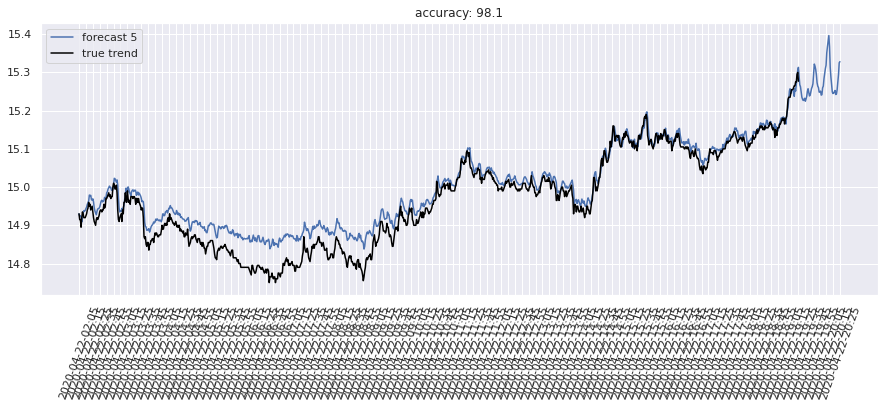

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(accepted_results[0], label = 'forecast 1')
plt.plot(df['silverClose'], label = 'true trend', c = 'black')
plt.legend()
plt.ylabel('Silver Price', fontsize=20)
plt.title('accuracy: 98.2')
x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::1000], date_ori[::1000])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/silver1.eps',dpi=1000)
plt.show()

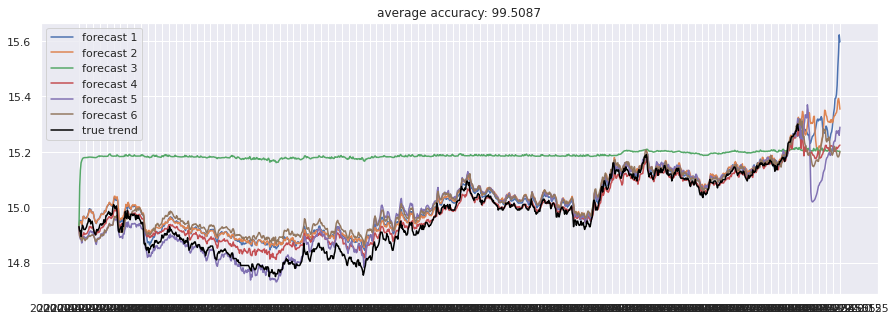

In [0]:
accuracies = [calculate_accuracy(df['silverClose'].values, r[:-test_size]) for r in accepted_results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['silverClose'], label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::10], date_ori[::10])

plt.show()

#Brent forecast

In [0]:
df2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/brent2020.csv") 

In [0]:
df2.head()

,date,brentOpen,brentHigh,brentLow,brentClose,volume,devise
0,16/04/2020 02:19,28.34,28.34,28.34,28.34,0,USD
1,16/04/2020 02:19,28.34,28.34,28.34,28.34,1,USD
2,16/04/2020 02:21,28.33,28.38,28.31,28.38,13,USD
3,16/04/2020 02:22,28.38,28.38,28.34,28.34,3,USD
4,16/04/2020 02:23,28.36,28.36,28.30,28.30,31,USD


In [0]:
df2.tail()

,date,brentOpen,brentHigh,brentLow,brentClose,volume,devise
6179,22/04/2020 22:36,20.99,20.99,20.99,20.99,2,USD
6180,22/04/2020 22:37,20.98,20.98,20.94,20.96,5,USD
6181,22/04/2020 22:38,20.98,20.98,20.95,20.95,10,USD
6182,22/04/2020 22:39,20.95,20.95,20.93,20.93,5,USD
6183,22/04/2020 22:40,20.93,20.95,20.92,20.95,15,USD


In [0]:
#change type dat to datetime
df2.date = pd.to_datetime(df2.date)
df2.set_index('date', inplace=True)

In [0]:
df2.describe()

,brentOpen,brentHigh,brentLow,brentClose,volume
count,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000
mean,24.906970,24.950223,24.864109,24.906193,211.724612
std,3.924427,3.901529,3.945522,3.924014,323.095332
min,15.980000,16.040000,15.980000,15.990000,0.000000
25%,20.700000,20.750000,20.630000,20.700000,38.000000
50%,27.010000,27.040000,26.990000,27.010000,109.500000
75%,28.130000,28.160000,28.100000,28.130000,256.000000
max,28.950000,29.000000,28.930000,28.960000,4862.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Date')

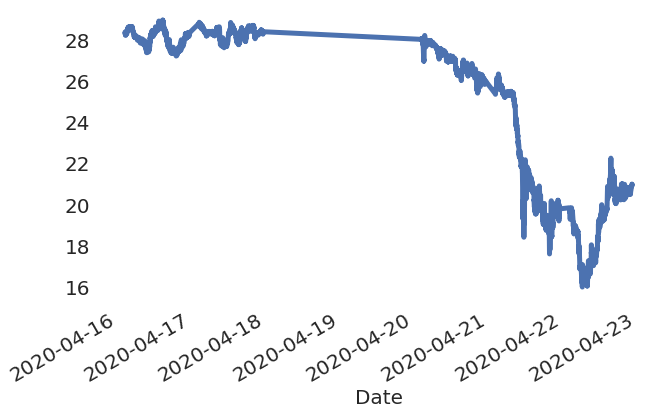

In [0]:
#plt.plot(df2['brentClose'])
df2['brentClose'].plot(figsize=(10,6), linewidth=5, fontsize=20)
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel('Date', fontsize=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Time')

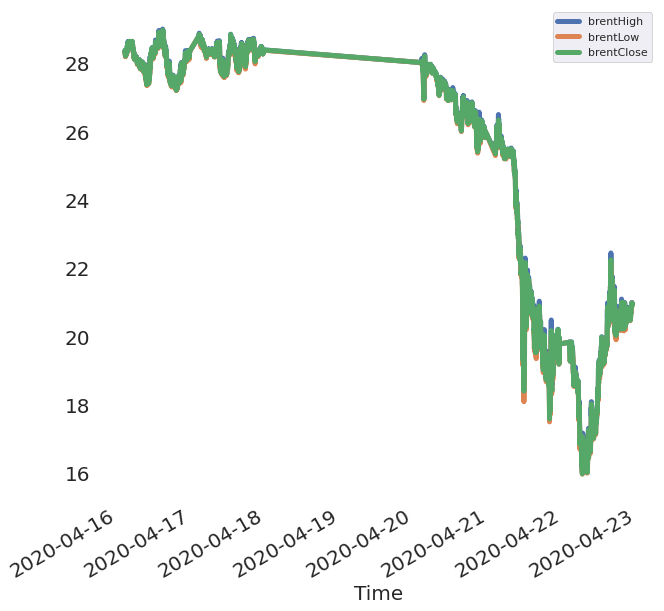

In [0]:
df2[['brentHigh','brentLow','brentClose']].plot(figsize=(10,10), linewidth=5, fontsize=20)
ax=plt.axes()
ax.set_facecolor("white")
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlabel('Time', fontsize=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Time')

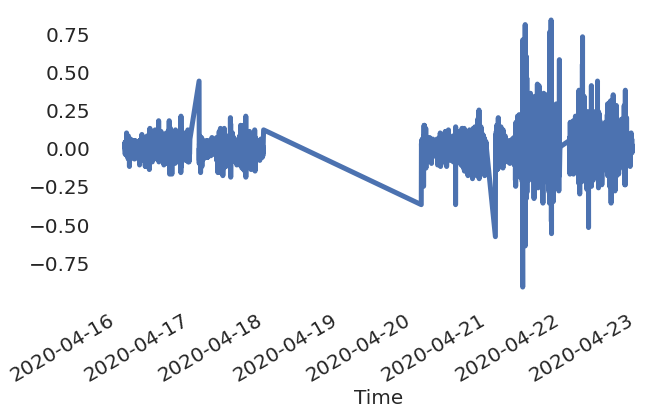

In [0]:
#Volatility
df2['brentClose'].diff(periods=1).plot(figsize=(10,6),linewidth=5,fontsize=20)
ax=plt.axes()
ax.set_facecolor("white")
plt.xlabel('Time', fontsize=20)

In [0]:
minmax = MinMaxScaler().fit(df2.iloc[:, 3:4].astype('float32')) # Close index
df_log = minmax.transform(df2.iloc[:, 3:4].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.954440
1,0.954440
2,0.952124
3,0.954440
4,0.951351


In [0]:
simulation_size = 10
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 60
learning_rate = 0.01

df_train = df_log
df2.shape, df_train.shape

((6184, 7), (6184, 1))

In [0]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [0]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(minutes = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(minutes= 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.4)
    
    return deep_future

In [0]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:15<00:00,  4.85s/it, acc=98.8, cost=0.000769]


simulation 2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:18<00:00,  4.86s/it, acc=98.8, cost=0.000918]


simulation 3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:33<00:00,  4.91s/it, acc=98.7, cost=0.000933]


simulation 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:23<00:00,  4.88s/it, acc=98.8, cost=0.000925]


simulation 5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:22<00:00,  4.87s/it, acc=98.8, cost=0.000924]


simulation 6


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:35<00:00,  4.92s/it, acc=98.8, cost=0.000831]


simulation 7


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [25:16<00:00,  5.06s/it, acc=98.8, cost=0.000833]


simulation 8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:10<00:00,  4.84s/it, acc=98.7, cost=0.000914]


simulation 9


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:18<00:00,  4.86s/it, acc=98.8, cost=0.00083]


simulation 10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [24:45<00:00,  4.95s/it, acc=98.8, cost=0.000847]


In [0]:
#df2.reset_index(inplace = True) 

In [0]:
date_ori = pd.to_datetime(df2.iloc[:, 0]).tolist()
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(minutes = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d-%H:%M').tolist()
date_ori[-3:]

['2020-04-22-23:38', '2020-04-22-23:39', '2020-04-22-23:40']

In [0]:
accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(df2['brentClose'])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(df2['brentClose']) * 2).sum() == 0:
        accepted_results.append(r)
len(accepted_results)

10

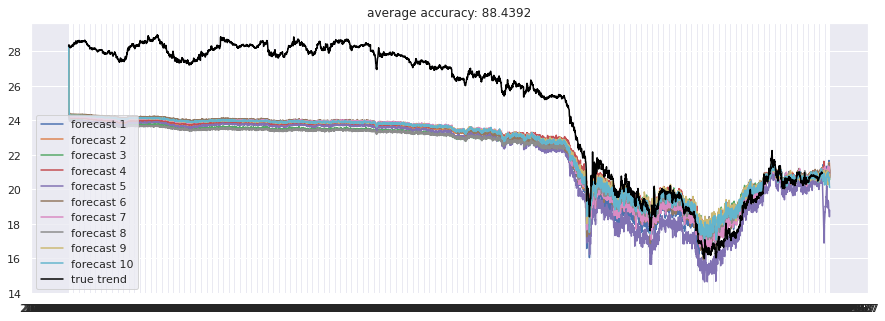

In [0]:
accuracies = [calculate_accuracy(df2['brentClose'].values, r[:-test_size]) for r in accepted_results]

sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df3['wtiClose'], label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::1000], date_ori[::1000])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/brent0.eps',dpi=1000)
plt.show()

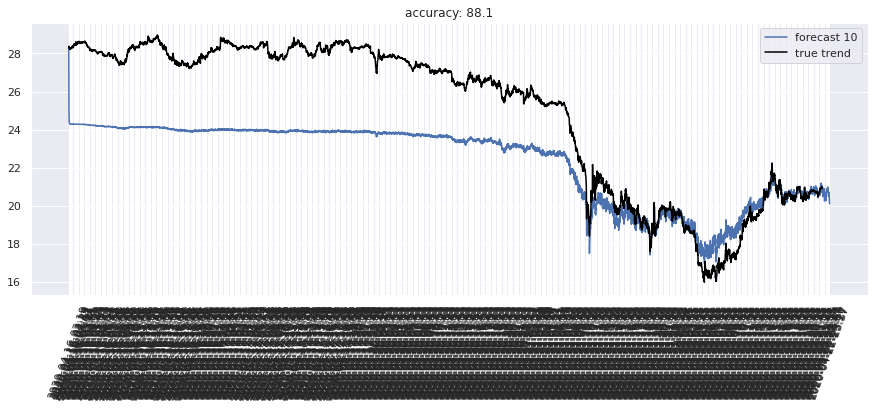

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(accepted_results[0], label = 'forecast 1')
plt.plot(df3['wtiClose'], label = 'true trend', c = 'black')
plt.legend()
plt.ylabel('WTI Price', fontsize=20)
plt.title('accuracy: 98.2')
x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::1000], date_ori[::1000])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/brent1.eps',dpi=1000)
plt.show()

WTI forecast


In [0]:
df3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/wti2020.csv") 

In [0]:
df3.head()

,date,wtiOpen,wtiHigh,wtiLow,wtiClose,volume,devise
0,16/04/2020 02:19,20.44,20.44,20.44,20.44,0,USD
1,16/04/2020 02:19,20.44,20.44,20.44,20.44,1,USD
2,16/04/2020 02:21,20.46,20.46,20.46,20.46,1,USD
3,16/04/2020 02:23,20.45,20.45,20.45,20.45,1,USD
4,16/04/2020 02:30,20.40,20.43,20.40,20.41,29,USD


In [0]:
df3.iloc[:, 4:5]

,wtiClose
0,20.44
1,20.44
2,20.46
3,20.45
4,20.41
...,...
4211,14.19
4212,14.35
4213,14.26
4214,14.28


In [0]:
minmax = MinMaxScaler().fit(df3.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df3.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.909617
1,0.909617
2,0.910508
3,0.910062
4,0.908281


In [0]:
simulation_size = 10
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 60
learning_rate = 0.01

df_train = df_log
df3.shape, df_train.shape

((4216, 7), (4216, 1))

In [0]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [0]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df3.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(minutes = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(minutes= 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.4)
    
    return deep_future

In [0]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

train loop: 100%|██████████| 300/300 [17:57<00:00,  3.59s/it, acc=97, cost=0.00355]


simulation 2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [18:29<00:00,  3.70s/it, acc=98.7, cost=0.00142]


simulation 3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [18:33<00:00,  3.71s/it, acc=98.7, cost=0.00135]


simulation 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [18:20<00:00,  3.67s/it, acc=98.7, cost=0.00131]


simulation 5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop:  53%|█████▎    | 160/300 [09:47<09:24,  4.03s/it, acc=98.7, cost=0.00139]

In [0]:
date_ori = pd.to_datetime(df3.iloc[:, 0]).tolist()
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(minutes = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d-%H:%M').tolist()
date_ori[-3:]

NameError: ignored

In [0]:
accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(df3['wtiClose'])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(df3['wtiClose']) * 2).sum() == 0:
        accepted_results.append(r)
len(accepted_results)

10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


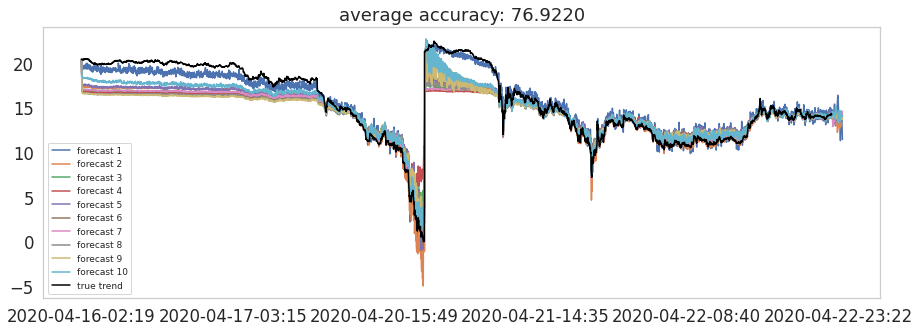

In [0]:
accuracies = [calculate_accuracy(df3['wtiClose'].values, r[:-test_size]) for r in accepted_results]
sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df3['wtiClose'], label = 'true trend', c = 'black')
plt.legend(loc=3, prop={'size': 9})
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::850], date_ori[::850])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/wti.eps',dpi=1000)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


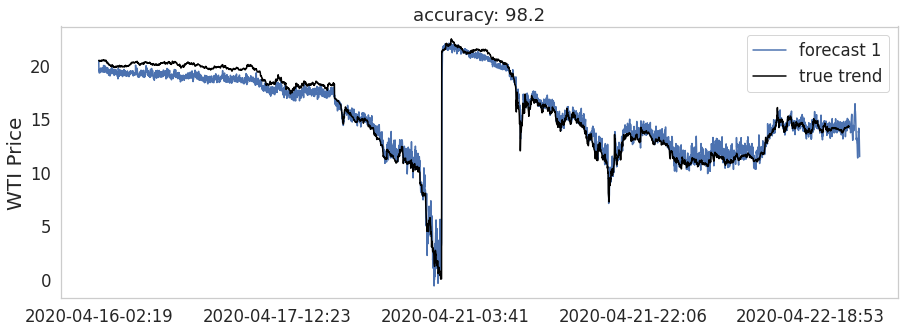

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(accepted_results[0], label = 'forecast 1')
plt.plot(df3['wtiClose'], label = 'true trend', c = 'black')
plt.legend()
plt.ylabel('WTI Price', fontsize=20)
plt.title('accuracy: 98.2')
x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::1000], date_ori[::1000])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/wtiforecast.eps',dpi=1000)
plt.show()

## Wheat forcast

In [0]:
df4= pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/wheat2020.csv") 

In [0]:
df4.head()

,date,wheatOpen,wheatHigh,wheatLow,wheatClose,volume,devise
0,15/04/2020 02:50,5.410,5.410,5.410,5.410,0,USD
1,15/04/2020 02:50,5.410,5.410,5.410,5.410,1,USD
2,15/04/2020 02:58,5.408,5.408,5.408,5.408,2,USD
3,15/04/2020 03:02,5.410,5.410,5.410,5.410,3,USD
4,15/04/2020 03:04,5.408,5.408,5.408,5.408,1,USD


In [0]:
df4.iloc[:, 4:5]

,wheatClose
0,5.410
1,5.410
2,5.408
3,5.410
4,5.408
...,...
2916,5.425
2917,5.423
2918,5.425
2919,5.440


In [0]:
minmax = MinMaxScaler().fit(df4.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df4.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.437837
1,0.437837
2,0.432432
3,0.437837
4,0.432432


In [0]:
simulation_size = 10
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 60
learning_rate = 0.01

df_train = df_log
df4.shape, df_train.shape

((2921, 7), (2921, 1))

In [0]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [0]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df4.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(minutes = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(minutes= 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.4)
    
    return deep_future

In [0]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [12:11<00:00,  2.44s/it, acc=98, cost=0.00139]


simulation 2


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [12:18<00:00,  2.46s/it, acc=98.1, cost=0.0013]


simulation 3


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:42<00:00,  2.34s/it, acc=96.4, cost=0.00409]


simulation 4


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:45<00:00,  2.35s/it, acc=98, cost=0.00148]


simulation 5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:44<00:00,  2.35s/it, acc=97.8, cost=0.00191]


simulation 6


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:40<00:00,  2.33s/it, acc=97.7, cost=0.00185]


simulation 7


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:30<00:00,  2.30s/it, acc=97.5, cost=0.00199]


simulation 8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:20<00:00,  2.27s/it, acc=97.8, cost=0.00174]


simulation 9


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:31<00:00,  2.31s/it, acc=97.5, cost=0.00223]


simulation 10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
train loop: 100%|██████████| 300/300 [11:47<00:00,  2.36s/it, acc=92.6, cost=0.0161]


In [0]:
date_ori = pd.to_datetime(df4.iloc[:, 0]).tolist()
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(minutes = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d-%H:%M').tolist()
date_ori[-3:]

['2020-04-22-20:13', '2020-04-22-20:14', '2020-04-22-20:15']

In [0]:
accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(df4['wheatClose'])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(df4['wheatClose']) * 2).sum() == 0:
        accepted_results.append(r)
len(accepted_results)

10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


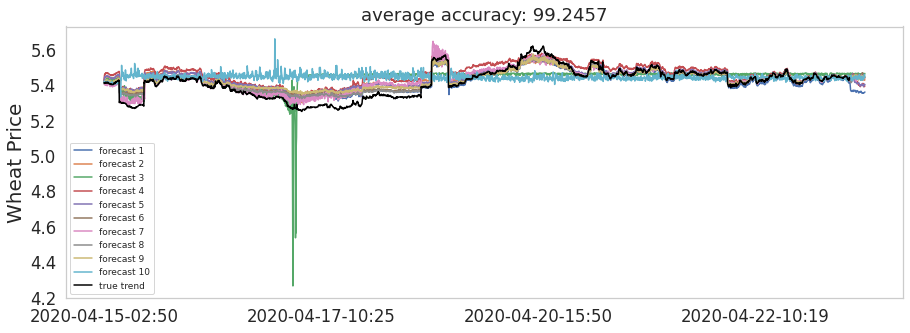

In [0]:
accuracies = [calculate_accuracy(df4['wheatClose'].values, r[:-test_size]) for r in accepted_results]
#sns.set(font_scale=1.5, style="whitegrid")
plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df4['wheatClose'], label = 'true trend', c = 'black')
plt.legend(loc=3, prop={'size': 9})
plt.ylabel('Wheat Price', fontsize=20)
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::850], date_ori[::850])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/wheatfcast1.eps',dpi=1000)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


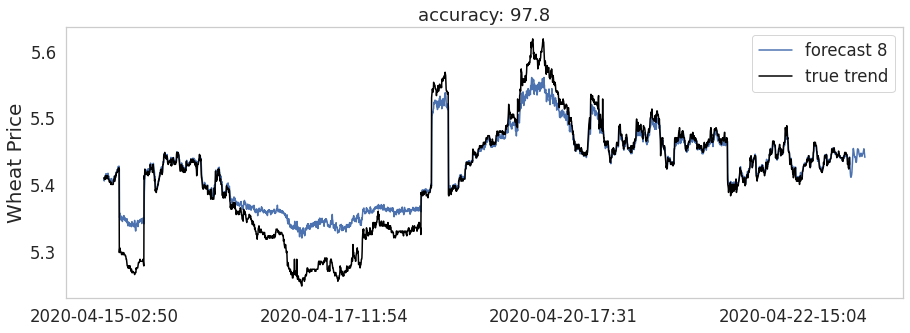

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(accepted_results[7], label = 'forecast 8')
plt.plot(df4['wheatClose'], label = 'true trend', c = 'black')
plt.legend()
plt.ylabel('Wheat Price', fontsize=20)
plt.title('accuracy: 97.8')
x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::900], date_ori[::900])
plt.grid(None) 
plt.savefig('/content/drive/My Drive/Colab Notebooks/wti1.eps',dpi=1000)
plt.show()